In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/Iris.csv')
data.drop('Id', axis = 1,inplace=True)

In [41]:
data.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [42]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [43]:
data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 0
data.loc[data['Species'] == 'Iris-versicolor', 'Species'] = 1
data.loc[data['Species'] == 'Iris-virginica', 'Species'] = 2

In [44]:
data.rename(columns={'Species': 'target'}, inplace=True)
data.rename(columns={'SepalLengthCm': 'sepal_length'}, inplace=True)
data.rename(columns={'SepalWidthCm': 'sepal_width'}, inplace=True)
data.rename(columns={'PetalLengthCm': 'petal_length'}, inplace=True)
data.rename(columns={'PetalWidthCm': 'petal_width'}, inplace=True)

In [45]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [47]:
data['target'] = data['target'].astype('int')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [49]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [50]:
data = data.drop_duplicates(keep='first').reset_index(drop=True)

In [51]:
data.duplicated().sum()

0

In [52]:
data['target'].unique()

array([0, 1, 2])

EDA

In [53]:
data['target'].value_counts()

1    50
2    49
0    48
Name: target, dtype: int64

<Axes: ylabel='target'>

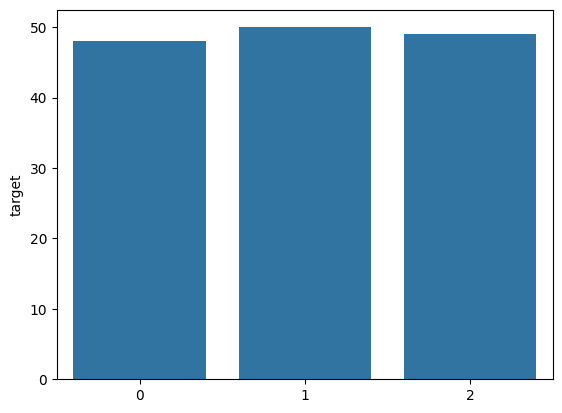

In [54]:
sns.barplot(data['target'].value_counts())

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

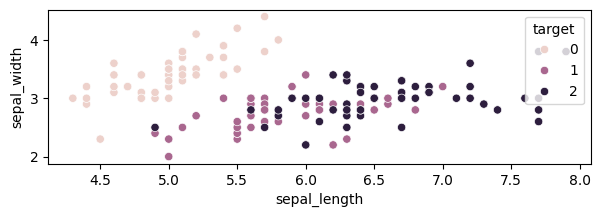

In [55]:
plt.figure(figsize=(7,2))
sns.scatterplot(data=data, x = 'sepal_length',y= 'sepal_width', hue = 'target')

<Axes: xlabel='petal_length', ylabel='petal_width'>

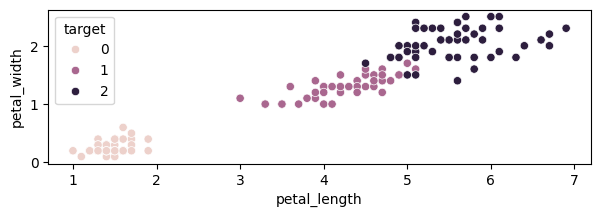

In [56]:
plt.figure(figsize=(7,2))
sns.scatterplot(data=data, x = 'petal_length',y= 'petal_width', hue = 'target')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

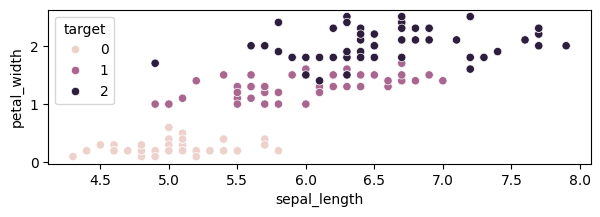

In [57]:
plt.figure(figsize=(7,2))
sns.scatterplot(data=data, x = 'sepal_length',y= 'petal_width', hue = 'target')

<Axes: xlabel='petal_length', ylabel='sepal_width'>

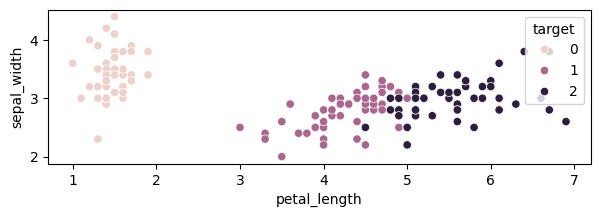

In [58]:
plt.figure(figsize=(7,2))
sns.scatterplot(data=data, x = 'petal_length',y= 'sepal_width', hue = 'target')

<Axes: >

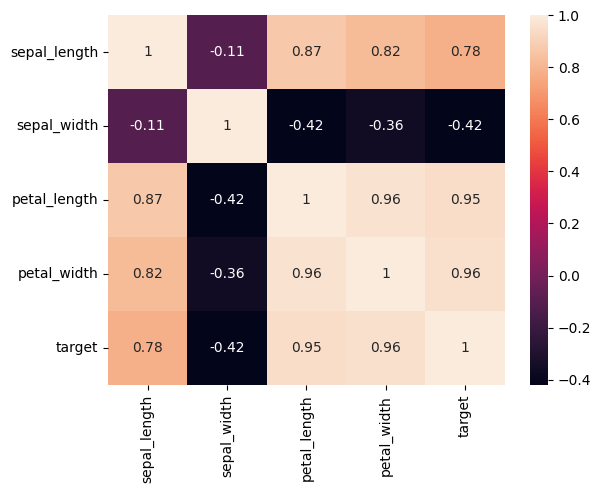

In [59]:
sns.heatmap(data.corr(), annot = True)

<Axes: >

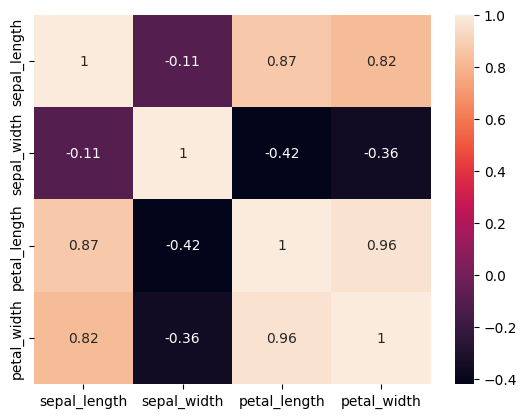

In [60]:
sns.heatmap(data.drop('target',axis=1).corr(), annot = True)

In [61]:
data = data.drop('petal_length', axis=1)

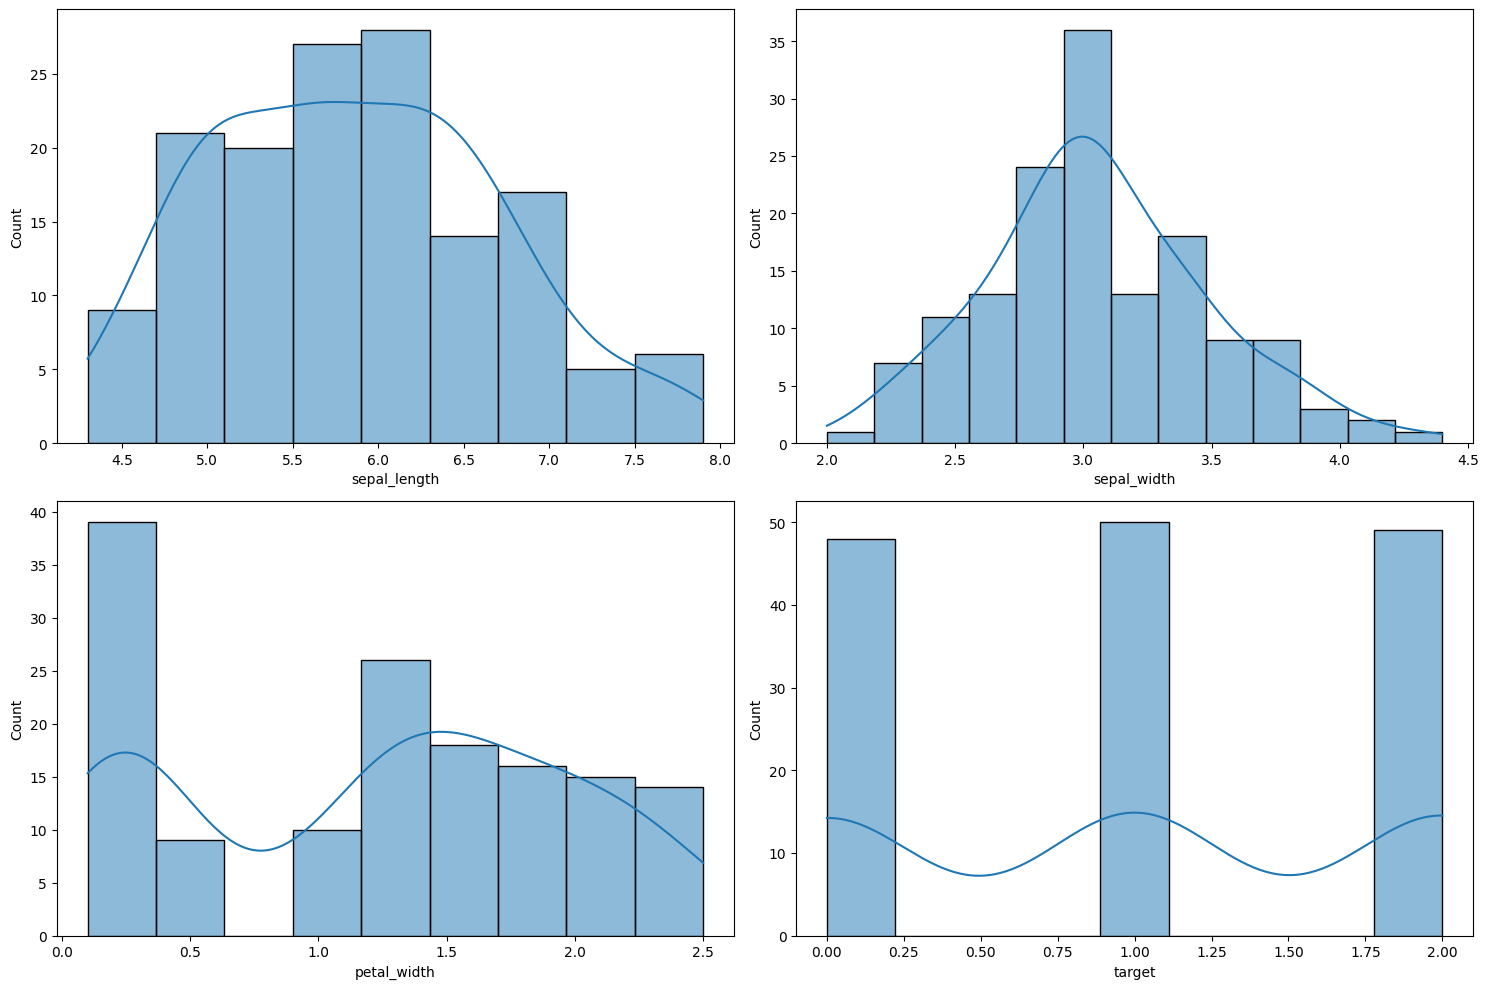

In [62]:

plotnumber = 1
plt.figure(figsize=(15, 10))

for column in data.columns:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column)
        plt.ylabel('Count')
        plotnumber += 1

plt.tight_layout()
plt.show()

In [63]:
data['petal_width'].skew()

-0.11347861374619836

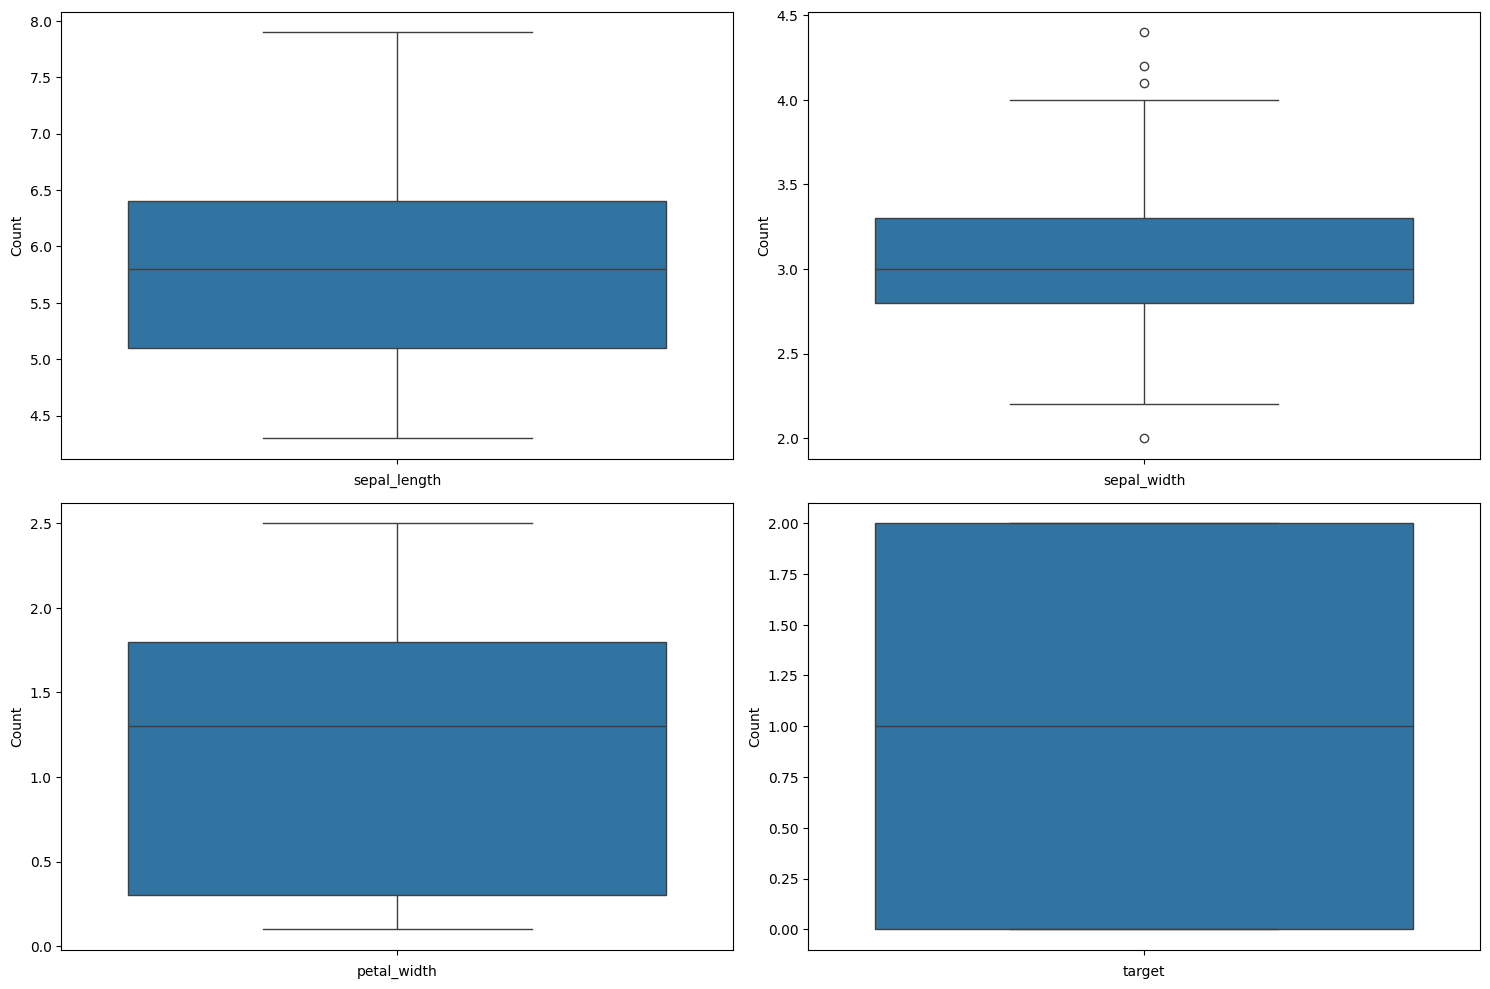

In [64]:

plotnumber = 1
plt.figure(figsize=(15, 10))

for column in data.columns:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel('Count')
        plotnumber += 1

plt.tight_layout()
plt.show()

Preprocessing (handle outliers, scaling etc)

In [65]:
import numpy as np

def replace_outliers_with_median(data):
    # Calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # Define the lower and upper bounds for outliers using the 3-sigma rule
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    # Calculate the percentage of outliers
    percentage_outliers = np.mean(outliers) * 100

    # Replace outliers with the median if percentage is less than 5%
    if percentage_outliers < 5:
        median = np.median(data)
        data[outliers] = median

    return data


In [66]:
data['sepal_width'] = replace_outliers_with_median(data['sepal_width'])

<ipython-input-65-2c75bad1dba6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = median


In [67]:
data['sepal_length'] = replace_outliers_with_median(data['sepal_length'])

<ipython-input-65-2c75bad1dba6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = median


<Axes: ylabel='sepal_length'>

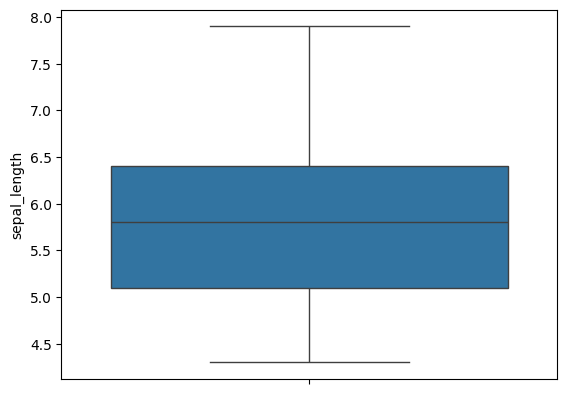

In [68]:
sns.boxplot(data = data['sepal_length'])

In [69]:
import numpy as np

def replace_outliers_with_median2(data):
    # Calculate the first quartile (Q1)
    Q1 = np.percentile(data, 25)

    # Calculate the third quartile (Q3)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers using the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    # Calculate the percentage of outliers
    percentage_outliers = np.mean(outliers) * 100

    # Replace outliers with the median if percentage is less than 5%
    if percentage_outliers < 5:
        median = np.median(data)
        data[outliers] = median

    return data


In [70]:
# data['petal_length'] = replace_outliers_with_median2(data['petal_length'])

In [71]:
data['petal_width'] = replace_outliers_with_median2(data['petal_width'])

<ipython-input-69-03037b1ad7b5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers] = median


In [72]:
data

,sepal_length,sepal_width,petal_width,target
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0
...,...,...,...,...
142,6.7,3.0,2.3,2
143,6.3,2.5,1.9,2
144,6.5,3.0,2.0,2
145,6.2,3.4,2.3,2


find clear clustering

In [73]:
X = data.drop('target', axis=1)

In [74]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init='auto' ,random_state=10,init = 'k-means++')
model.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=10)

In [75]:
model.cluster_centers_

array([[5.01041667, 3.40208333, 0.25      ],
       [6.8       , 3.05833333, 1.95833333],
       [5.76470588, 2.7       , 1.40588235]])

In [76]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

Text(0, 0.5, 'sepal_width')

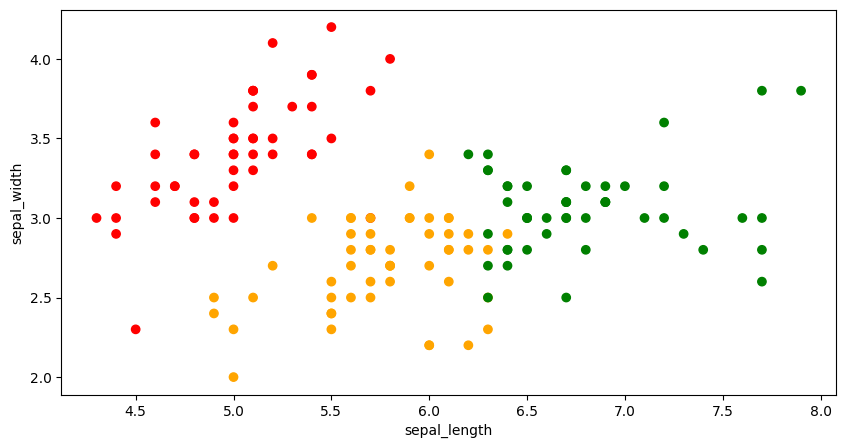

In [77]:
plt.figure(figsize=(10,5))
color_schema = np.array(['red','green','orange'])
plt.scatter(X['sepal_length'],X['sepal_width'],color=color_schema[model.labels_])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [78]:
data['labels'] = pd.DataFrame(model.labels_)

In [79]:
data

,sepal_length,sepal_width,petal_width,target,labels
0,5.1,3.5,0.2,0,0
1,4.9,3.0,0.2,0,0
2,4.7,3.2,0.2,0,0
3,4.6,3.1,0.2,0,0
4,5.0,3.6,0.2,0,0
...,...,...,...,...,...
142,6.7,3.0,2.3,2,1
143,6.3,2.5,1.9,2,1
144,6.5,3.0,2.0,2,1
145,6.2,3.4,2.3,2,1


In [80]:
from sklearn.metrics import silhouette_score
silhouette_score(X,model.labels_)

0.46512821753622

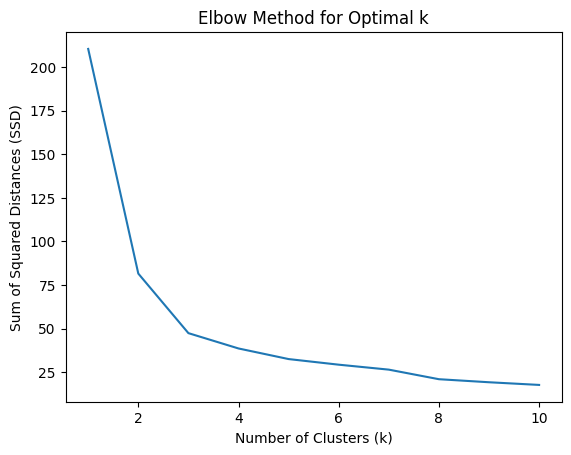

In [81]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize a list to store the SSD values
ssd = []

# Choose a range of k values
k_range = range(1, 11)

# Run K-means for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto',init = 'k-means++')
    kmeans.fit(X)  # Replace 'data' with your dataset
    ssd.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, ssd)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.show()
